In [2]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

% matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 


In [3]:
load_app_config()
DIRECTORY = "iris"
TRAINFILENAME = "iris_train.csv"
TESTFILENAME = "iris_test.csv"
FILENAME ='iris.csv'
input_path = get_datafolder_path()

{'REG': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'DEV': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'UAT': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'PRD': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}}
Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path


In [84]:
def start_classification(filename=FILENAME):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    
    print(" input file is :{0} loaded.".format(input_file))
    #plot_dataset(input_dataset)
    pp_dataset=preprocess_data(input_dataset)
    print(pp_dataset.info())
    
    try:
        continuous_vars = pp_dataset.describe().columns
        print(continuous_vars)
    except ValueError:
        print("no continous variables")
   
    try:
        categorical_vars = pp_dataset.describe(include=["object"]).columns
        print("Categorical:")
        print(categorical_vars)
        pp_dataset=pp_dataset.drop(categorical_vars,axis=1)
    except ValueError:
        print("no continous variables")
    
    print(pp_dataset.head(5).to_string())
    
    y=pp_dataset['labelled_class']
    X=pp_dataset.drop('labelled_class',axis=1)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn_model  = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X, y)
    X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
    print("Prediction:")
    y_predict=knn_model.predict(X)
    from sklearn import metrics
    print("Accuracy Score {0}".format(metrics.accuracy_score(y, y_predict)))
    
    knn_model2  = KNeighborsClassifier(n_neighbors=5)
    (train_X, test_X ,train_y ,test_y)=split_dataset(X,y,0.3,4)    
    knn_model2.fit(train_X,train_y)
    y_predict=knn_model2.predict(test_X)
    print("Accuracy Score -test data {0}".format(metrics.accuracy_score(test_y, y_predict)))
    
    test_n_models(train_X, test_X ,train_y ,test_y)

In [87]:
def test_n_models(train_X, test_X ,train_y ,test_y):
    test_scores = []
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics 
    for n in range(1,26):
        knn_model  = KNeighborsClassifier(n_neighbors=n)
        knn_model.fit(train_X, train_y)
        y_predict = knn_model.predict(test_X)
        test_scores.append(metrics.accuracy_score(test_y, y_predict))
    plt.plot(range(1,26), test_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Accuracy')          
    #print(test_scores)

In [55]:
def plot_dataset(input_dataset):
    #g = sns.PairGrid(input_dataset)
    #g.map(plt.scatter)
    
    sns.pairplot(input_dataset, hue="class", size=3.5,palette="husl");
     

In [47]:
def preprocess_data(input_dataset):
    class_le = LabelEncoder()
    labelled_class = class_le.fit_transform(input_dataset["class"])
    input_dataset['labelled_class']=labelled_class
    print("count of labelled class:{0}".format(input_dataset['labelled_class'].unique().size) )
    return input_dataset


 input file is :F:\DataSource\iris\iris.csv loaded.
count of labelled class:3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
class             150 non-null object
labelled_class    150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'labelled_class'],
      dtype='object')
Categorical:
Index(['class'], dtype='object')
   sepal_length  sepal_width  petal_length  petal_width  labelled_class
0           5.1          3.5           1.4          0.2               0
1           4.9          3.0           1.4          0.2               0
2           4.7          3.2           1.3          0.2               0
3           4.6          3.1           1.5          0.2              

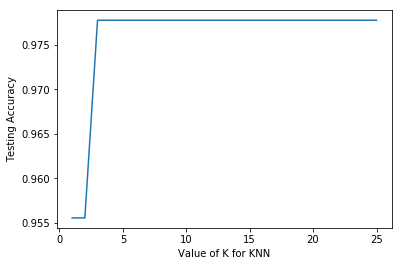

In [86]:
start_classification(FILENAME)